In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import parallel_coordinates

In [4]:
# teste = pd.read_csv('../data_science/turmas_2015-2017.csv')

# series_teste = (teste['ano'].map(str)+teste['periodo'].map(str))
# teste['periodoano'] = series_teste.astype(int)

# teste.to_csv('../data_science/turmas_new.csv')

In [3]:
dataFrame = pd.read_csv('data_science/turmas_new.csv')

discA = 'CÁLCULO I'
discB = 'CÁLCULO II'

lista_disciplinas = ['CÁLCULO I', 'CÁLCULO II', 'CÁLCULO III']

dataFrame = dataFrame.dropna()

print(dataFrame.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'descricao', 'discente', 'id_turma',
       'media_final', 'codigo', 'nome', 'ano', 'periodo',
       'unidade_responsavel', 'id_curso', 'periodoano'],
      dtype='object')


#### Correlação

In [13]:
# correlação entre duas disciplinas
def correlacao(discA, discB):
    dataFrame = pd.read_csv('../data_science/turmas_new.csv')
    dataFrameA = dataFrame[dataFrame['nome'] == discA]
    dataFrameB = dataFrame[dataFrame['nome'] == discB]

    # Aprovados no DiscA
    dataFrameA = dataFrameA[dataFrameA['descricao'].str.contains('APROVADO')]

    series_aprovados = dataFrameA.discente.unique()

    df_finalB = pd.DataFrame()

    for dis in series_aprovados:
        linhas = dataFrameB[dataFrameB['discente'] == dis]
        linha = linhas[linhas['periodoano'] == linhas.periodoano.min()]

        df_finalB = pd.concat([df_finalB, linha])

    # concatenando das tabelas
    colunas = ['discente', 'media_final', 'nome']
    dataFrameA = dataFrameA[colunas]
    df_finalB = df_finalB[colunas]

    conc = pd.concat([dataFrameA, df_finalB])

    df = pd.crosstab(conc.discente, conc.nome, conc.media_final,aggfunc=np.mean)
    df = df.dropna()
    df_correlacao = df.corr()

    return df_correlacao[discA][discB]

In [81]:
df_retorno = pd.DataFrame(columns=lista_disciplinas)

# matriz de zeros
w, h = len(lista_disciplinas), len(lista_disciplinas)
content = [[0] * w for i in range(h)]
correlacoes = np.array(content, dtype='f')

# calculo das relacões sem repetição
for i in range(0, len(lista_disciplinas)):
    for j in range(0, len(lista_disciplinas)):
        if i==j:
            correlacoes[i][j] = 1
        if i<j:
            correlacoes[i][j] = correlacao(lista_disciplinas[i], lista_disciplinas[j])

In [84]:
df_retorno = pd.DataFrame(correlacoes,
                          columns=lista_disciplinas)
df_retorno = df_retorno.set_axis(lista_disciplinas, axis=0, inplace=False)
df_retorno
# df_retorno.set_axis(lista_disciplinas, axis=0, inplace=False)

CÁLCULO I  CÁLCULO II  CÁLCULO III
CÁLCULO I          1.0    0.456186     0.452459
CÁLCULO II         0.0    1.000000     0.458779
CÁLCULO III        0.0    0.000000     1.000000

#### Coordenadas Paralelas

In [3]:
dataFrame = pd.read_csv('../data_science/turmas_new.csv')
dataFrame.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'descricao', 'discente', 'id_turma',
       'media_final', 'codigo', 'nome', 'ano', 'periodo',
       'unidade_responsavel', 'id_curso', 'periodoano'],
      dtype='object')

In [4]:
disciplinas = ['CÁLCULO I', 'CÁLCULO II', 'CÁLCULO III']

In [5]:
# Contando reprovações de media_final notnull
df_contagemRep = dataFrame[dataFrame['descricao'].str.contains('REPROVADO')]
df_contagemRep = df_contagemRep[df_contagemRep.media_final.notnull()]

colunas_1 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome']
df_contagemRep = df_contagemRep[colunas_1].drop_duplicates()

# df_contagemRep[df_contagemRep.discente=='f3895ff9fc386821a519db524a8aeaac']
df_contagemRep = df_contagemRep[df_contagemRep['nome'].isin(disciplinas)]
df_contagemRep = df_contagemRep.groupby(['discente']).descricao.count().reset_index()
df_contagemRep.sort_values('descricao', ascending=False).head()

discente  descricao
2050  d903aa4840276efef32badaa777ac42a          6
1698  b3141ec4bbcb82a33da7c7d9c73a691f          5
777   54c638989c2444abbbbfe98fa078915d          5
2271  ef9181bc5150462578a6ff0e59cc624a          5
1602  a8986898db5ebe12d23e1ec9e2b075c7          5

In [6]:
# Aprovados e não foram reprovados
series_Rep = df_contagemRep['discente']

df_NRep = dataFrame[dataFrame['descricao'].str.contains('APROVADO')]

# tirando os reprovados
df_NRep = df_NRep[~df_NRep['discente'].isin(series_Rep)]
df_NRep = df_NRep[df_NRep.media_final.notnull()]

colunas_2 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome']
df_NRep = df_NRep[colunas_2].drop_duplicates()
df_NRep = df_NRep[df_NRep['nome'].isin(disciplinas)]
df_NRep.head()

descricao                          discente  media_final  id_turma  \
79  APROVADO  bb67c2ca87d0e1fcf027b2f0f6df4221          8.5   1242602   
82  APROVADO  4847ea230075170dc33c8607eab37780          8.0   1242602   
83  APROVADO  d00171e04d77a7994414014d941baf8c         10.0   1242602   
84  APROVADO  87c8ed9b5ee46a87b620af169806703f          7.8   1242602   
85  APROVADO  3ff085f94a31cdddd21d355d0d8f6438         10.0   1242602   

         nome  
79  CÁLCULO I  
82  CÁLCULO I  
83  CÁLCULO I  
84  CÁLCULO I  
85  CÁLCULO I

In [7]:
# junta APROVADOS e REPROVADOS
aprovados = pd.DataFrame();
aprovados['discente'] = df_NRep['discente'];
aprovados['descricao'] = df_NRep['descricao'];

aprovados = aprovados.replace('APROVADO', 0)
aprovados = aprovados.replace('APROVADO POR NOTA', 0)

df_contagem = pd.concat([df_contagemRep, aprovados])

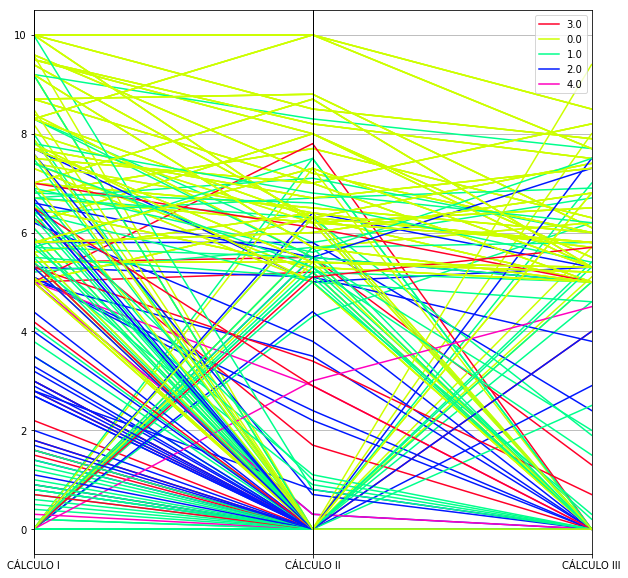

In [8]:
colunas = ['discente', 'nome', 'media_final']
# tirando duplicados e NaN
grafico = dataFrame[colunas].drop_duplicates().dropna()
grafico = grafico[grafico['nome'].isin(disciplinas)]

df_grafico = pd.crosstab(grafico.discente,grafico.nome,grafico.media_final,aggfunc=np.max).reset_index()
df_grafico = pd.merge(df_grafico, df_contagem, on='discente',how='left')

df_grafico= df_grafico.fillna(0)
#eixo = plt.gca()
plt.figure(figsize=(10,10))
df_grafico= df_grafico[['CÁLCULO I', 'CÁLCULO II', 'CÁLCULO III', 'descricao']]
parallel_coordinates(frame=df_grafico.head(300), class_column='descricao',colormap='gist_rainbow')
#eixo.legend_.remove()

In [11]:
np.array(df_grafico['CÁLCULO I'])

array([5.4, 0. , 9.5, ..., 4.6, 0. , 6. ])

In [5]:
import json

response_data = {}
response_data['result'] = 'error'
response_data['message'] = 'Some error message'

#### Serviços das matérias

In [64]:
codigos = ['ECT2101','ECT2102','ECT2103','ECT2104','ECT2201','ECT2202','ECT2203','ECT2204','ECT2207','ECT2301',
'ECT2303','ECT2304', 'ECT2401', 'ECT2402','ECT2411','ECT2412','ECT2413']

In [65]:
#codigos = dataFrame.codigo.unique()
#codigos

In [66]:
df_disciplinas = pd.read_csv('data_science/componentes-curriculares-presenciais-ok.csv')
df_disciplinas.columns

Index(['Unnamed: 0', 'id_componente', 'tipo_componente', 'codigo', 'nivel',
       'nome', 'unidade_responsavel', 'ch_teorico', 'ch_pratico', 'ch_estagio',
       'ch_total', 'ch_dedicada_docente', 'ch_ead', 'cr_max_ead',
       'permite_horario_flexivel', 'qtd_unidades', 'procedimentos_avaliacao',
       'equivalencia', 'pre_requisito', 'co_requisito', 'ementa',
       'bibliografia', 'objetivos', 'conteudo', 'competencias_habilidades',
       'referencias', 'ano_programa', 'periodo_programa', 'modalidade',
       'curso_componente'],
      dtype='object')

In [67]:
df_disciplinas = df_disciplinas[df_disciplinas['unidade_responsavel'] == 'ESCOLA DE CIÊNCIAS E TECNOLOGIA']
df_disciplinas = df_disciplinas[df_disciplinas.codigo.isin(codigos)]

colDisc = ['codigo', 'nome']
df_disciplinas = df_disciplinas[colDisc]
df_disciplinas.shape

(17, 2)

In [68]:
df_disciplinas.nome.unique()

array(['PRÉ-CÁLCULO', 'CÁLCULO I', 'CÁLCULO II', 'ÁLGEBRA LINEAR',
       'CÁLCULO III', 'PROBABILIDADE E ESTATÍSTICA',
       'INTRODUÇÃO À FÍSICA CLÁSSICA I',
       'INTRODUÇÃO À FÍSICA CLÁSSICA II',
       'INTRODUÇÃO À FÍSICA CLÁSSICA III', 'LÓGICA DE PROGRAMAÇÃO',
       'LINGUAGEM DE PROGRAMAÇÃO', 'COMPUTAÇÃO NUMÉRICA', 'QUÍMICA GERAL',
       'CIÊNCIA E TECNOLOGIA DOS MATERIAIS', 'MECÂNICA DOS FLUIDOS',
       'MECÂNICA DOS SÓLIDOS', 'VETORES E GEOMETRIA ANALÍTICA'],
      dtype=object)

In [69]:
periodo1 = ['PRÉ-CÁLCULO','VETORES E GEOMETRIA ANALÍTICA','CÁLCULO I','QUÍMICA GERAL']
periodo2 = ['CÁLCULO II','ÁLGEBRA LINEAR','PROBABILIDADE E ESTATÍSTICA','LÓGICA DE PROGRAMAÇÃO',
           'INTRODUÇÃO À FÍSICA CLÁSSICA I']
periodo3 = ['CÁLCULO III','INTRODUÇÃO À FÍSICA CLÁSSICA II','LINGUAGEM DE PROGRAMAÇÃO']
periodo4 = ['COMPUTAÇÃO NUMÉRICA','MECÂNICA DOS SÓLIDOS','MECÂNICA DOS FLUIDOS',
           'INTRODUÇÃO À FÍSICA CLÁSSICA III','CIÊNCIA E TECNOLOGIA DOS MATERIAIS']

In [70]:
df_1 = df_disciplinas[df_disciplinas.nome.isin(periodo1)]
df_1['periodo'] = 1

df_2 = df_disciplinas[df_disciplinas.nome.isin(periodo2)]
df_2['periodo'] = 2

df = pd.concat([df_1, df_2])

df_3 = df_disciplinas[df_disciplinas.nome.isin(periodo3)]
df_3['periodo'] = 3

df = pd.concat([df, df_3])

df_4 = df_disciplinas[df_disciplinas.nome.isin(periodo4)]
df_4['periodo'] = 4

df = pd.concat([df, df_4])

/home/andressa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/andressa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/andressa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [71]:
df.nome.unique()

array(['PRÉ-CÁLCULO', 'CÁLCULO I', 'QUÍMICA GERAL',
       'VETORES E GEOMETRIA ANALÍTICA', 'CÁLCULO II', 'ÁLGEBRA LINEAR',
       'PROBABILIDADE E ESTATÍSTICA', 'INTRODUÇÃO À FÍSICA CLÁSSICA I',
       'LÓGICA DE PROGRAMAÇÃO', 'CÁLCULO III',
       'INTRODUÇÃO À FÍSICA CLÁSSICA II', 'LINGUAGEM DE PROGRAMAÇÃO',
       'INTRODUÇÃO À FÍSICA CLÁSSICA III', 'COMPUTAÇÃO NUMÉRICA',
       'CIÊNCIA E TECNOLOGIA DOS MATERIAIS', 'MECÂNICA DOS FLUIDOS',
       'MECÂNICA DOS SÓLIDOS'], dtype=object)

In [72]:
df

codigo                                nome  periodo
22799  ECT2101                         PRÉ-CÁLCULO        1
22800  ECT2103                           CÁLCULO I        1
22813  ECT2104                       QUÍMICA GERAL        1
33834  ECT2102       VETORES E GEOMETRIA ANALÍTICA        1
22801  ECT2201                          CÁLCULO II        2
22802  ECT2202                      ÁLGEBRA LINEAR        2
22804  ECT2207         PROBABILIDADE E ESTATÍSTICA        2
22805  ECT2204      INTRODUÇÃO À FÍSICA CLÁSSICA I        2
22810  ECT2203               LÓGICA DE PROGRAMAÇÃO        2
22803  ECT2301                         CÁLCULO III        3
22806  ECT2304     INTRODUÇÃO À FÍSICA CLÁSSICA II        3
22811  ECT2303            LINGUAGEM DE PROGRAMAÇÃO        3
22807  ECT2402    INTRODUÇÃO À FÍSICA CLÁSSICA III        4
22812  ECT2401                 COMPUTAÇÃO NUMÉRICA        4
22837  ECT2411  CIÊNCIA E TECNOLOGIA DOS MATERIAIS        4
22838  ECT2413                MECÂNICA DOS FLUIDOS        4
22839  ECT2412                MECÂNICA DOS SÓLIDOS        4

In [73]:
teste_col = ['-', # PRÉ-CÁLCULO
             '-', # CÁLCULO I
             '-', # QUÍMICA GERAL
             '-', # VETORES E GEOMETRIA ANALÍTICA
             'ECT2102',# ÁLGEBRA LINEAR
             'ECT2101,ECT2103,ECT2102',# CÁLCULO II
             'ECT2103',# PROBABILIDADE E ESTATÍSTICA
             'ECT2103',# INTRODUÇÃO À FÍSICA CLÁSSICA I
             '-',# LÓGICA DE PROGRAMAÇÃO
             'ECT2201',# CÁLCULO III
             'ECT2204',# INTRODUÇÃO À FÍSICA CLÁSSICA II
             'ECT2203',# LINGUAGEM DE PROGRAMAÇÃO
             'ECT2301,ECT2304',# INTRODUÇÃO À FÍSICA CLÁSSICA III
             'ECT2303,ECT2103',# COMPUTAÇÃO NUMÉRICA
             'ECT2104',# CIÊNCIA E TECNOLOGIA DOS MATERIAIS
             'ECT2304,ECT2201',# MECÂNICA DOS FLUIDOS
             'ECT2201,ECT2204'# MECÂNICA DOS SÓLIDOS
            ]

In [74]:
df['pre_requisito'] = teste_col

In [86]:
df = df[['codigo', 'nome', 'periodo', 'pre_requisito']]
df

codigo                                nome  periodo  \
0   ECT2101                         PRÉ-CÁLCULO        1   
1   ECT2103                           CÁLCULO I        1   
2   ECT2104                       QUÍMICA GERAL        1   
3   ECT2102       VETORES E GEOMETRIA ANALÍTICA        1   
4   ECT2201                          CÁLCULO II        2   
5   ECT2202                      ÁLGEBRA LINEAR        2   
6   ECT2207         PROBABILIDADE E ESTATÍSTICA        2   
7   ECT2204      INTRODUÇÃO À FÍSICA CLÁSSICA I        2   
8   ECT2203               LÓGICA DE PROGRAMAÇÃO        2   
9   ECT2301                         CÁLCULO III        3   
10  ECT2304     INTRODUÇÃO À FÍSICA CLÁSSICA II        3   
11  ECT2303            LINGUAGEM DE PROGRAMAÇÃO        3   
12  ECT2402    INTRODUÇÃO À FÍSICA CLÁSSICA III        4   
13  ECT2401                 COMPUTAÇÃO NUMÉRICA        4   
14  ECT2411  CIÊNCIA E TECNOLOGIA DOS MATERIAIS        4   
15  ECT2413                MECÂNICA DOS FLUIDOS        4   
16  ECT2412                MECÂNICA DOS SÓLIDOS        4   

              pre_requisito  
0                         -  
1                         -  
2                         -  
3                         -  
4                   ECT2102  
5   ECT2101,ECT2103,ECT2102  
6                   ECT2103  
7                   ECT2103  
8                         -  
9                   ECT2201  
10                  ECT2204  
11                  ECT2203  
12          ECT2301,ECT2304  
13          ECT2303,ECT2103  
14                  ECT2104  
15          ECT2304,ECT2201  
16          ECT2201,ECT2204

In [87]:
df.to_csv('data_science/disciplinas_prerequisitos.csv')

### Desvio Padrão

In [88]:
def variancia (data):
    media = data.mean()
    soma = 0
    soma += ((data.map(int)-media) ** 2).sum()
    variancia = soma / (len(data)-1)
    
    return variancia

In [102]:
df_teste = pd.read_csv('data_science/turmas_2015-2017.csv')

aux = df_teste[df_teste['nome']=='CÁLCULO II'].media_final

print("Desvio de C2:")
print((variancia(aux))**0.5)

Desvio de C2:
2.805958819277207
